# 1.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [2]:
zf = zipfile.ZipFile("us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11332\1090335997.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open('us_perm_visas.csv'))


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable

In [3]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [4]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [5]:
df_select = df[['case_status','class_of_admission', 'us_economic_sector', 'pw_job_title_9089', 'country_of_citzenship']]
df_select.head()

,case_status,class_of_admission,us_economic_sector,pw_job_title_9089,country_of_citzenship
0,Certified,J-1,IT,"Computer Software Engineers, Applications",ARMENIA
1,Denied,B-2,Other Economic Sector,ASBESTOS HANDLER,POLAND
2,Certified,H-1B,Aerospace,Civil Engineer,INDIA
3,Certified,B-2,Other Economic Sector,File Clerk,SOUTH KOREA
4,Certified,L-1,Advanced Mfg,Sales & Service Engineer,CANADA


# 3.) Clean your data for a decision tree

In [6]:
X= pd.get_dummies(df_select, columns=['class_of_admission', 'us_economic_sector', 'pw_job_title_9089', 'country_of_citzenship'], prefix=['class_of_admission', 'us_economic_sector', 'pw_job_title_9089', 'country_of_citzenship']).drop(["case_status"], axis = 1)
y = df_select['case_status']

# 4.) Fit and plot a decision tree of depth 3

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

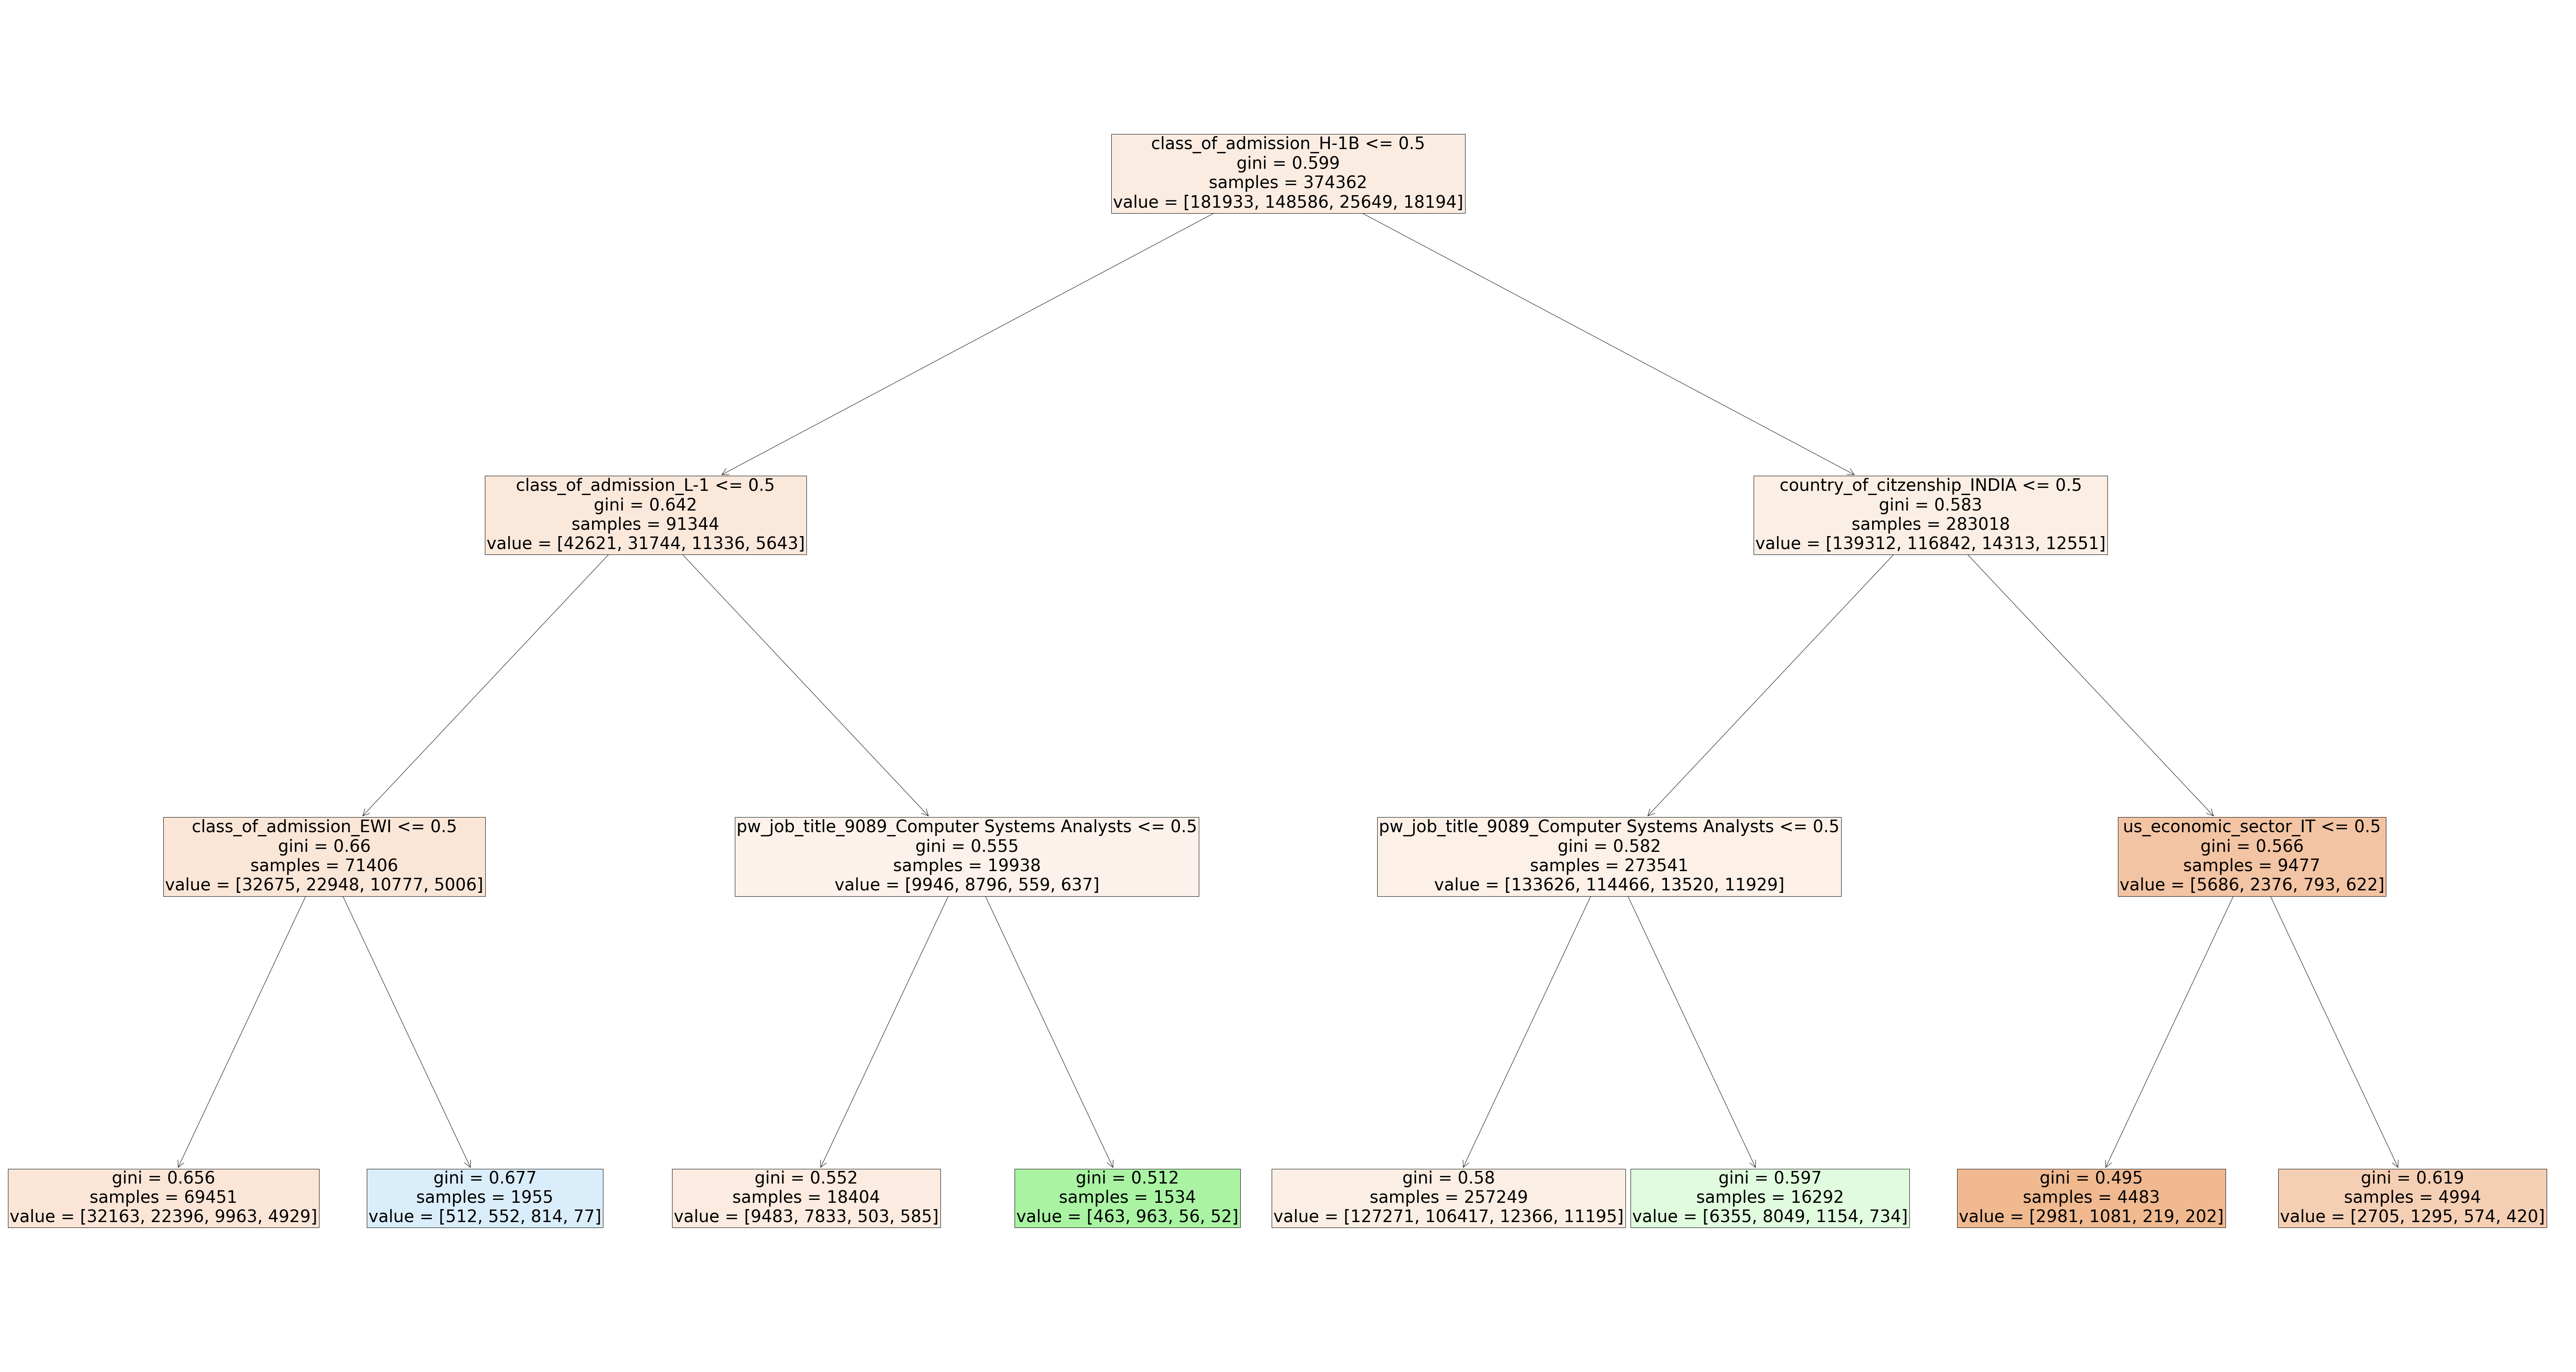

In [38]:
plt.figure(figsize = (110,60))
tree.plot_tree(clf,feature_names = X.columns, filled=True, fontsize = 40)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node

### - The largest leaf node by sample size is 257,249. This node can be interpreted as of those that were first admitted to the country under an H-1B visa, whose country of citizenship was India, and job title is a Computer Systems Analyst, 257,249 of them were given citizenship, a case status of certified. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [39]:
max_depths = [1,2,3]
outputs = []

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25)

In [42]:
from sklearn.metrics import accuracy_score

In [45]:
for md in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth = md)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    oos_accuracy = accuracy_score(y_test, y_pred)  
    outputs.append((md, oos_accuracy))

In [46]:
print(outputs)

[(1, 0.4862112809992414), (2, 0.4862112809992414), (3, 0.4930281757861333)]


- As you can see above, the max_depth of 3 had the highest out-of sample accuracy score at 0.4930281757861333.